<h1>HW6</h1>

# Question
### (Inverse Transform Sampling) Complete the following exercises 

### 1.1

Create a function to sample from a Gaussian distribution with mean $\mu$ and standard deviation $\sigma$:

* Function name: sample_gaussian

* Input: $\mu$, $\sigma$, n

* Output: a n-element vector of random sample from Gaussian~N($\mu$, $\sigma$)

* You are `not allowed` to use the Distributions.jl package or any existing sampler
* You are `allowed` to use SpecialFunctions.jl for special functions and rand for random number generation


An [example](https://stephens999.github.io/fiveMinuteStats/inverse_transform_sampling.html) of inverse transform sampling

In [1]:
import Pkg
Pkg.add(["SpecialFunctions", "Plots"])

    Updating registry at `C:\Users\maria\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\maria\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\maria\.julia\environments\v1.8\Manifest.toml`


In [2]:
import SpecialFunctions
import Plots

In [3]:
using SpecialFunctions, Plots, Random
function sample_gaussian(𝜇,𝜎,n)
    data = []
    for i=1:n
        random_samples = rand()
        gaussian_samples = @. 𝜇 + (𝜎 * sqrt(2) * erfinv((2 * random_samples) - 1))
        push!(data, gaussian_samples)
    end
    return data
end

sample_gaussian (generic function with 1 method)

### 1.2


1. Use the sampler above to draw 10000 samples from a Gaussian distribution~N($\mu$ = -1, $\sigma$ = 2)
2. Plot the histogram of the 10000 samples 
3. Use the Distributions.jl package to obtain the pdf of the same Gaussian distribution~N($\mu$ = -1, $\sigma$ = 2) using x = -8:0.001:6
4. Plot the pdf on top of the histogram from step 2

In [4]:
Data = sample_gaussian(-1,2,10000)

10000-element Vector{Any}:
 -2.1245442840372473
 -0.4029589250558262
  0.10745361563366851
  0.40484914990282683
 -1.936250684637097
 -2.1964033036031165
 -6.510365461869394
  0.19752007819398454
  1.676487766826253
 -4.172478899866212
 -2.143545751057571
 -4.143081997065815
 -2.8000321535596515
  ⋮
 -0.26330546516633024
 -2.0318588564611715
  1.9243627006071864
 -0.7872307856767218
 -1.468787703789188
  1.3942182852009615
 -0.05251709777872726
  2.5818363860781677
 -0.24565755509015585
 -0.9673540547336854
 -4.808742931092385
 -2.3459821645731624

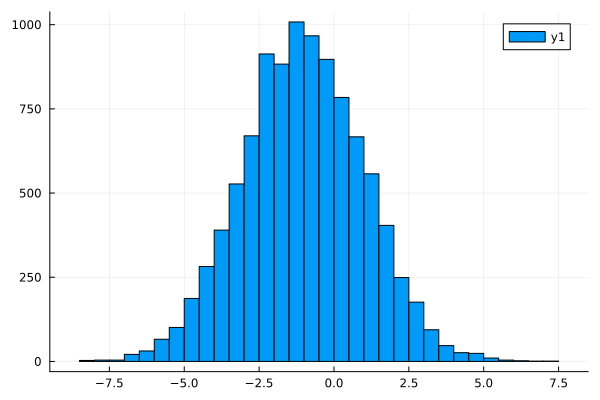

In [5]:
histogram(Data)

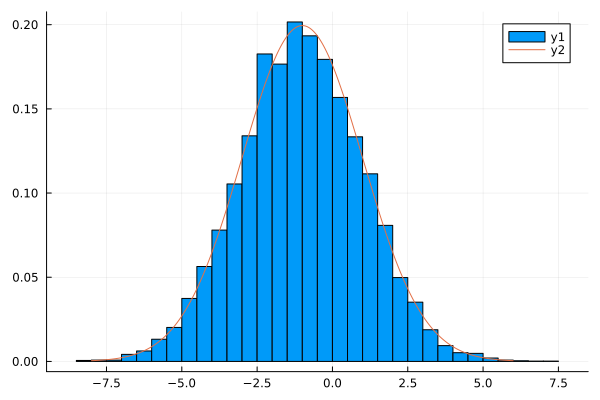

In [9]:
using Distributions
x = -8:0.001:6
Gaussian = pdf.(Normal(-1,2),x)
histogram(Data, normalize=true)
plot!(x,Gaussian)